In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib


In [2]:
data=pd.read_csv('Delhi_v2.csv')

In [3]:
data.head()

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593


In [4]:
#PRICE WILL BE DEPENDENT VARIABLE  
#ADDRESSS ,AREA ,BEDROOMS BALCONY,STATUS,NEWOLD,PARKING,FURNISHED STATUS, LIFT,TYPE OF BUILDING 
data.shape

(7738, 18)

In [5]:
data.groupby('type_of_building')['type_of_building'].agg('count')

type_of_building
Flat                6226
Individual House    1512
Name: type_of_building, dtype: int64

In [6]:
# droping those data which are not important for example 
#->lattitude ,longitiude,desc,Landmarks.
# it is part of data cleaning process
data2=data.drop(['latitude','longitude','desc','Landmarks'],axis="columns")
data2.head()

,Unnamed: 0,price,Address,area,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,Flat,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,Flat,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,Flat,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,Flat,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,Flat,4592.592593


In [7]:
# remove the null values or replacing the null values
data2.isnull().sum()

Unnamed: 0             0
price                  0
Address                0
area                   0
Bedrooms               0
Bathrooms              0
Balcony             2572
Status               574
neworold               0
parking             5126
Furnished_status    3614
Lift                6005
type_of_building       0
Price_sqft             0
dtype: int64

In [8]:
# Remove the datasets 

new_data2=data2.fillna(method='ffill')
new_data2=new_data2.fillna(method="bfill")
# filling the null values with the 1 so that data could be predicted normally
new_data2.isnull().sum()

Unnamed: 0          0
price               0
Address             0
area                0
Bedrooms            0
Bathrooms           0
Balcony             0
Status              0
neworold            0
parking             0
Furnished_status    0
Lift                0
type_of_building    0
Price_sqft          0
dtype: int64

In [9]:
data2.shape
new_data2.head()

,Unnamed: 0,price,Address,area,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,3.0,Under Construction,New Property,1.0,Semi-Furnished,2.0,Flat,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,3.0,Ready to Move,New Property,1.0,Semi-Furnished,2.0,Flat,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,3.0,Ready to Move,New Property,1.0,Unfurnished,2.0,Flat,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,2.0,2.0,3.0,Ready to Move,New Property,1.0,Unfurnished,2.0,Flat,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,2.0,2.0,3.0,Ready to Move,Resale,1.0,Unfurnished,3.0,Flat,4592.592593


In [10]:
data2['Bedrooms'].unique()

array([ 3.,  4.,  2.,  5.,  6., 10.,  7.,  8.,  9.])

In [11]:
data2[data2.Bedrooms>9]

,Unnamed: 0,price,Address,area,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft
151,151,45000000.0,"Sector 42, Gurgaon, Delhi NCR",9000.0,10.0,10.0,10.0,NaN,Resale,10.0,Unfurnished,NaN,Flat,5000.000000
316,316,35000000.0,"Sector 50, Noida, Delhi NCR, Sector 50, Noida,...",8500.0,10.0,7.0,7.0,Ready to Move,Resale,3.0,Semi-Furnished,NaN,Individual House,4117.647059
1375,1375,22500000.0,"Laxmi Nagar, New Delhi - East, Delhi NCR",507.0,10.0,6.0,NaN,Ready to Move,Resale,NaN,Unfurnished,NaN,Individual House,44378.698225
1788,1788,25000000.0,"RC35 Archana Enclave Khora, Sector 57, Noida, ...",3744.0,10.0,8.0,4.0,Ready to Move,Resale,1.0,Unfurnished,NaN,Flat,6677.350427
2207,2207,22500000.0,"c-2442, sushant lok-1, gurgaon, New Delhi, Del...",540.0,10.0,10.0,5.0,Ready to Move,Resale,3.0,Furnished,NaN,Flat,41666.666667
2619,2619,9350000.0,"Mithapur Extension, New Delhi - South, Delhi NCR",900.0,10.0,7.0,6.0,Ready to Move,Resale,NaN,Unfurnished,NaN,Individual House,10388.888889
3122,3122,30000000.0,"Sector 3, Faridabad, Delhi NCR",6140.0,10.0,7.0,4.0,Ready to Move,Resale,NaN,Semi-Furnished,NaN,Flat,4885.993485
3179,3179,9000000.0,"Faridabad, Jeevan Nagar, Faridabad, Delhi NCR",1300.0,10.0,8.0,3.0,Ready to Move,Resale,NaN,Semi-Furnished,NaN,Flat,6923.076923
3641,3641,12000000.0,"heera nagar, Sector 11, Gurgaon, Delhi NCR",1350.0,10.0,4.0,4.0,Ready to Move,Resale,NaN,Unfurnished,NaN,Flat,8888.888889
4138,4138,12500000.0,"Indrapuri Colony, Ghaziabad, Delhi NCR",1800.0,10.0,5.0,NaN,Ready to Move,Resale,NaN,Furnished,NaN,Individual House,6944.444444


In [12]:
# Data cleaning in which data is insufficient and useless or checking hypothetical data

In [13]:

new_data2[(new_data2.Bedrooms>5)&(new_data2['type_of_building']=='Flat')]

,Unnamed: 0,price,Address,area,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft
47,47,4800000.0,"Ghaziabad, Vivekanand Nagar, Ghaziabad, Delhi NCR",1232.0,6.0,3.0,2.0,Ready to Move,Resale,1.0,Unfurnished,2.0,Flat,3896.103896
151,151,45000000.0,"Sector 42, Gurgaon, Delhi NCR",9000.0,10.0,10.0,10.0,Ready to Move,Resale,10.0,Unfurnished,1.0,Flat,5000.000000
255,255,28000000.0,"c-1/41 a, Budh Vihar Phase 1, New Delhi - Rohi...",2200.0,6.0,5.0,2.0,Ready to Move,Resale,1.0,Semi-Furnished,3.0,Flat,12727.272727
352,352,30000000.0,183 flat no.3 tower 1 floor 8th Windsor Greens...,4500.0,7.0,5.0,2.0,Ready to Move,Resale,2.0,Semi-Furnished,2.0,Flat,6666.666667
489,489,42500000.0,"C- 85., Sector 39 Block C, Noida, Delhi NCR",5500.0,6.0,7.0,2.0,Ready to Move,New Property,5.0,Furnished,2.0,Flat,7727.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7091,7091,30000000.0,"A Block, Sector 61 Block A, Noida, Delhi NCR",4000.0,8.0,6.0,6.0,Ready to Move,Resale,3.0,Semi-Furnished,3.0,Flat,7500.000000
7102,7102,49500000.0,6 BHK Villa with 1 BHK in Basement Park Facing...,4800.0,6.0,6.0,4.0,Ready to Move,Resale,1.0,Semi-Furnished,2.0,Flat,10312.500000
7109,7109,60000000.0,"Sushant Lok 1, Sushant Lok 1 Block C, Gurgaon,...",5000.0,8.0,8.0,2.0,Ready to Move,Resale,3.0,Semi-Furnished,0.0,Flat,12000.000000
7197,7197,40500000.0,"D Block, Sector 48 Block D, Noida, Delhi NCR",7000.0,9.0,9.0,9.0,Ready to Move,Resale,6.0,Unfurnished,2.0,Flat,5785.714286


In [14]:
#  Checking  any type of data error Columnns error datatype
new_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7738 non-null   int64  
 1   price             7738 non-null   float64
 2   Address           7738 non-null   object 
 3   area              7738 non-null   float64
 4   Bedrooms          7738 non-null   float64
 5   Bathrooms         7738 non-null   float64
 6   Balcony           7738 non-null   float64
 7   Status            7738 non-null   object 
 8   neworold          7738 non-null   object 
 9   parking           7738 non-null   float64
 10  Furnished_status  7738 non-null   object 
 11  Lift              7738 non-null   float64
 12  type_of_building  7738 non-null   object 
 13  Price_sqft        7738 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 846.5+ KB


In [15]:
new_data2.dtypes

Unnamed: 0            int64
price               float64
Address              object
area                float64
Bedrooms            float64
Bathrooms           float64
Balcony             float64
Status               object
neworold             object
parking             float64
Furnished_status     object
Lift                float64
type_of_building     object
Price_sqft          float64
dtype: object

In [16]:
#checking number of location 
new_data2.Address.unique()

array(['Noida Extension, Noida, Delhi NCR',
       'Sector 79, Gurgaon, Delhi NCR', 'Vaishali, Ghaziabad, Delhi NCR',
       ...,
       'Sector137 Noida Paramount Floraville, Sector 137, Noida, Delhi NCR',
       'Greater Noida, Sector 2, Greater Noida, Delhi NCR',
       'sandal apartment, Shalimar Garden Extension 1, Ghaziabad, Delhi NCR'],
      dtype=object)

In [17]:
# checking the len of total locations in dataset
len(new_data2.Address.unique())

4145

In [18]:
new_data2['Location']=new_data2['Address'].apply(lambda x:x.split(',')[0])
new_data2.head(10)

,Unnamed: 0,price,Address,area,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft,Location
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,3.0,Under Construction,New Property,1.0,Semi-Furnished,2.0,Flat,4148.148148,Noida Extension
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,3.0,Ready to Move,New Property,1.0,Semi-Furnished,2.0,Flat,5906.040268,Sector 79
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,3.0,Ready to Move,New Property,1.0,Unfurnished,2.0,Flat,6918.238994,Vaishali
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,2.0,2.0,3.0,Ready to Move,New Property,1.0,Unfurnished,2.0,Flat,3628.571429,Link Road
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,2.0,2.0,3.0,Ready to Move,Resale,1.0,Unfurnished,3.0,Flat,4592.592593,Jaypee Pavilion Court Sector 128
5,5,3700000.0,"tower 2, 6th floor, Crossings Republik, Ghazia...",1150.0,2.0,2.0,3.0,Ready to Move,New Property,1.0,Unfurnished,3.0,Flat,3217.391304,tower 2
6,6,3270000.0,"Nirala Aspire, GH03, Sector 16C, Hundal, Great...",890.0,2.0,2.0,3.0,Ready to Move,Resale,1.0,Unfurnished,2.0,Flat,3674.157303,Nirala Aspire
7,7,3990000.0,"Suncity Avenue 102, Sector 102, Gurgaon Bang o...",850.0,2.0,2.0,1.0,Ready to Move,Resale,1.0,Unfurnished,2.0,Flat,4694.117647,Suncity Avenue 102
8,8,3500000.0,"Sector 2, Greater Noida, Sector 2, Greater Noi...",960.0,2.0,2.0,2.0,Ready to Move,Resale,1.0,Unfurnished,2.0,Flat,3645.833333,Sector 2
9,9,5500000.0,"Gaur City 5th Avenue, Noida Extension, Noida, ...",1400.0,3.0,3.0,4.0,Ready to Move,Resale,1.0,Unfurnished,2.0,Flat,3928.571429,Gaur City 5th Avenue


In [19]:
Location1=new_data2.Location.value_counts()  # counting the number of location in the through the areas wise

In [20]:

# It is part of the Feature Enginnering 

len(Location1)


3318

In [21]:
len(Location1[Location1<=10])

3205

In [22]:
Location1_less_than=Location1[Location1<=10]
Location1_less_than


Shalimar garden                            10
G T Road                                   10
DLF Ankur Vihar                            10
Sector 6 Vaishali                          10
Shipra Suncity                             10
                                           ..
Vikaspuri Block D                           1
Godrej air                                  1
H1003 Godrej summit sector 104 Gurugram     1
New Industrial Township 2                   1
sandal apartment                            1
Name: Location, Length: 3205, dtype: int64

In [23]:
len(new_data2.Location.unique())

3318

In [24]:
new_data2.Location1=new_data2.Location.apply(lambda x:'other' if x in Location1_less_than else x)
len(new_data2.Location.unique())

C:\Users\hp\AppData\Local\Temp/ipykernel_11608/1773008775.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  new_data2.Location1=new_data2.Location.apply(lambda x:'other' if x in Location1_less_than else x)


3318

In [25]:
new_data2.head()

,Unnamed: 0,price,Address,area,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft,Location
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,3.0,Under Construction,New Property,1.0,Semi-Furnished,2.0,Flat,4148.148148,Noida Extension
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,3.0,Ready to Move,New Property,1.0,Semi-Furnished,2.0,Flat,5906.040268,Sector 79
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,3.0,Ready to Move,New Property,1.0,Unfurnished,2.0,Flat,6918.238994,Vaishali
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,2.0,2.0,3.0,Ready to Move,New Property,1.0,Unfurnished,2.0,Flat,3628.571429,Link Road
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,2.0,2.0,3.0,Ready to Move,Resale,1.0,Unfurnished,3.0,Flat,4592.592593,Jaypee Pavilion Court Sector 128


In [26]:
new_data6=new_data2[new_data2.area/new_data2.Bedrooms<100]

In [27]:
new_data6.head()

,Unnamed: 0,price,Address,area,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft,Location
1094,1094,14000000.0,"Bhola Nath Nagar, New Delhi - East, Delhi NCR",720.0,8.0,4.0,4.0,Ready to Move,Resale,2.0,Semi-Furnished,2.0,Flat,19444.444444,Bhola Nath Nagar
1375,1375,22500000.0,"Laxmi Nagar, New Delhi - East, Delhi NCR",507.0,10.0,6.0,1.0,Ready to Move,Resale,1.0,Unfurnished,0.0,Individual House,44378.698225,Laxmi Nagar
2207,2207,22500000.0,"c-2442, sushant lok-1, gurgaon, New Delhi, Del...",540.0,10.0,10.0,5.0,Ready to Move,Resale,3.0,Furnished,0.0,Flat,41666.666667,c-2442
2619,2619,9350000.0,"Mithapur Extension, New Delhi - South, Delhi NCR",900.0,10.0,7.0,6.0,Ready to Move,Resale,1.0,Unfurnished,2.0,Individual House,10388.888889,Mithapur Extension
3211,3211,22500000.0,"Sector 11, Gurgaon, Delhi NCR",537.0,9.0,7.0,3.0,Ready to Move,Resale,3.0,Unfurnished,0.0,Flat,41899.441341,Sector 11


In [28]:
new_data6.shape

(5, 15)

In [29]:

# Removing the data which is irrelvent or hypothtetical
new_data7=new_data2[~(new_data2.area/new_data2.Bedrooms<100)]

In [30]:
new_data7

,Unnamed: 0,price,Address,area,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft,Location
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,3.0,Under Construction,New Property,1.0,Semi-Furnished,2.0,Flat,4148.148148,Noida Extension
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,3.0,Ready to Move,New Property,1.0,Semi-Furnished,2.0,Flat,5906.040268,Sector 79
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,3.0,Ready to Move,New Property,1.0,Unfurnished,2.0,Flat,6918.238994,Vaishali
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,2.0,2.0,3.0,Ready to Move,New Property,1.0,Unfurnished,2.0,Flat,3628.571429,Link Road
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,2.0,2.0,3.0,Ready to Move,Resale,1.0,Unfurnished,3.0,Flat,4592.592593,Jaypee Pavilion Court Sector 128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7733,7733,7900000.0,"Indirapuram, Ghaziabad, Delhi NCR",1095.0,2.0,2.0,4.0,Ready to Move,Resale,1.0,Unfurnished,2.0,Flat,7214.611872,Indirapuram
7734,7734,4510000.0,"Greater Noida, Sector 2, Greater Noida, Delhi NCR",1060.0,2.0,2.0,3.0,Ready to Move,Resale,1.0,Semi-Furnished,2.0,Flat,4254.716981,Greater Noida
7735,7735,7000000.0,"Crossings Republik, Ghaziabad, Delhi NCR",1898.0,4.0,3.0,5.0,Ready to Move,Resale,1.0,Semi-Furnished,2.0,Flat,3688.092729,Crossings Republik
7736,7736,6500000.0,"Raj Nagar Extension, Ghaziabad, Raj Nagar Exte...",1400.0,3.0,3.0,2.0,Ready to Move,Resale,1.0,Semi-Furnished,3.0,Flat,4642.857143,Raj Nagar Extension


In [31]:
new_data7.shape

(7733, 15)

In [32]:
#fetching information for particular column
new_data7.Price_sqft.describe()


count     7733.000000
mean      5526.841434
std       2289.611256
min       2100.000000
25%       3949.843260
50%       4972.375691
75%       6349.206349
max      27777.777778
Name: Price_sqft, dtype: float64

In [33]:
# Checking the mininum and maximun value in the data that is:
#Minimum value= 2100  RS
#maximum value= 27777 RS
# It is justified way to Minimum value and Maximum value 

new_data7.head()

,Unnamed: 0,price,Address,area,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft,Location
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,3.0,Under Construction,New Property,1.0,Semi-Furnished,2.0,Flat,4148.148148,Noida Extension
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,3.0,Ready to Move,New Property,1.0,Semi-Furnished,2.0,Flat,5906.040268,Sector 79
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,3.0,Ready to Move,New Property,1.0,Unfurnished,2.0,Flat,6918.238994,Vaishali
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,2.0,2.0,3.0,Ready to Move,New Property,1.0,Unfurnished,2.0,Flat,3628.571429,Link Road
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,2.0,2.0,3.0,Ready to Move,Resale,1.0,Unfurnished,3.0,Flat,4592.592593,Jaypee Pavilion Court Sector 128


In [34]:
new_data7.Location.unique()

array(['Noida Extension', 'Sector 79', 'Vaishali', ..., 'C16-02',
       'Sector137 Noida Paramount Floraville', 'sandal apartment'],
      dtype=object)

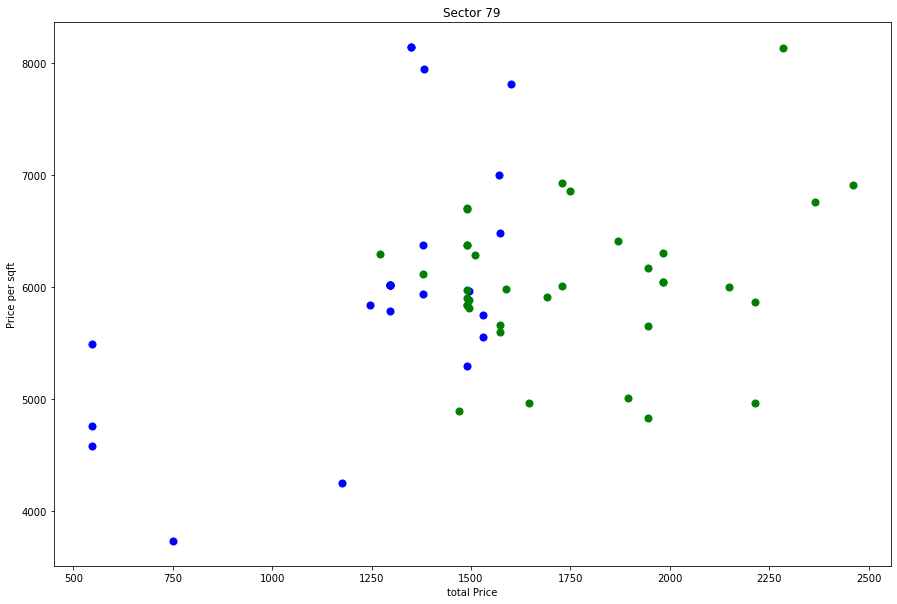

In [35]:
# Finding the outliers  
def plot_scatter_chart(df,location):
    bhk2=new_data7[(new_data7.Location==location)&(new_data7.Bedrooms==2)]
    bhk3=new_data7[(new_data7.Location==location)&(new_data7.Bedrooms==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.area,bhk2.Price_sqft,color='blue',label='2 bhk',s=50)
    plt.scatter(bhk3.area,bhk3.Price_sqft,color='Green',label='3 bhk',s=50)
    plt.xlabel("total Price")
    plt.ylabel("Price per sqft")
    plt.title(location)
    plt.show()
plot_scatter_chart(new_data7,"Sector 79")

In [36]:
# We are removing those outlieres which are remove 2bhk apartments whose price_per_sqft is less than mean price_per sqft of 1 BHK apartment

In [37]:
{
    '1':{
        'mean':4000,
        'std':2000,
        'count':34
    },
    '2':{
        'mean':4300,
        'std':2300,
        'count':22
    },
}

{'1': {'mean': 4000, 'std': 2000, 'count': 34},
 '2': {'mean': 4300, 'std': 2300, 'count': 22}}

In [38]:


new_data9=new_data7[(new_data7.Bedrooms>2)&(new_data7.area<4000)]
new_data9.head()

,Unnamed: 0,price,Address,area,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft,Location
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,3.0,Under Construction,New Property,1.0,Semi-Furnished,2.0,Flat,4148.148148,Noida Extension
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,3.0,Ready to Move,New Property,1.0,Semi-Furnished,2.0,Flat,5906.040268,Sector 79
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,3.0,Ready to Move,New Property,1.0,Unfurnished,2.0,Flat,6918.238994,Vaishali
9,9,5500000.0,"Gaur City 5th Avenue, Noida Extension, Noida, ...",1400.0,3.0,3.0,4.0,Ready to Move,Resale,1.0,Unfurnished,2.0,Flat,3928.571429,Gaur City 5th Avenue
10,10,7300000.0,"Sector 24 Rohini, New Delhi - Rohini, Delhi NCR",850.0,3.0,2.0,1.0,Ready to Move,New Property,2.0,Semi-Furnished,1.0,Flat,8588.235294,Sector 24 Rohini


In [39]:
new_data7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7733 entries, 0 to 7737
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7733 non-null   int64  
 1   price             7733 non-null   float64
 2   Address           7733 non-null   object 
 3   area              7733 non-null   float64
 4   Bedrooms          7733 non-null   float64
 5   Bathrooms         7733 non-null   float64
 6   Balcony           7733 non-null   float64
 7   Status            7733 non-null   object 
 8   neworold          7733 non-null   object 
 9   parking           7733 non-null   float64
 10  Furnished_status  7733 non-null   object 
 11  Lift              7733 non-null   float64
 12  type_of_building  7733 non-null   object 
 13  Price_sqft        7733 non-null   float64
 14  Location          7733 non-null   object 
dtypes: float64(8), int64(1), object(6)
memory usage: 966.6+ KB


In [40]:
new_data7['City']=new_data7['Address'].apply(lambda x:x.split(',')[1])
new_data7.head()

C:\Users\hp\AppData\Local\Temp/ipykernel_11608/1207579450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data7['City']=new_data7['Address'].apply(lambda x:x.split(',')[1])


,Unnamed: 0,price,Address,area,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft,Location,City
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,3.0,Under Construction,New Property,1.0,Semi-Furnished,2.0,Flat,4148.148148,Noida Extension,Noida
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,3.0,Ready to Move,New Property,1.0,Semi-Furnished,2.0,Flat,5906.040268,Sector 79,Gurgaon
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,3.0,Ready to Move,New Property,1.0,Unfurnished,2.0,Flat,6918.238994,Vaishali,Ghaziabad
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,2.0,2.0,3.0,Ready to Move,New Property,1.0,Unfurnished,2.0,Flat,3628.571429,Link Road,F Block
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,2.0,2.0,3.0,Ready to Move,Resale,1.0,Unfurnished,3.0,Flat,4592.592593,Jaypee Pavilion Court Sector 128,Noida


In [41]:
Price_of_the_meanUnder=new_data7[new_data7['Status']=='Under Construction'].price.mean()
Price_of_the_meanUnder

12199473.684210526

In [42]:
Price_of_the_meanfull=new_data7[new_data7['Status']=='Ready to Move'].price.mean()
Price_of_the_meanfull

8304696.655431682

In [43]:
MeanAREA=new_data7[new_data7['Status']=='Under Construction'].area.mean()
MeanAREA

1781.7894736842106

In [44]:
MeanAREA1=new_data7[new_data7['Status']=='Ready to Move'].area.mean()
MeanAREA1

1409.0878921441536

In [45]:
MeanPrice1=new_data7[new_data7['Bedrooms']==2].price.mean()
MeanPrice1

4916550.354609929

In [46]:
MeanPrice2=new_data7[new_data7['Bedrooms']==3].price.mean()
MeanPrice2

8988974.206937445

In [47]:
MeanPrice3=new_data7[new_data7['Bedrooms']==4].price.mean()
MeanPrice3

17421137.07165109

In [48]:
MeanPrice4=new_data7[new_data7['Bedrooms']==5].price.mean()
MeanPrice4

30401020.408163264

In [49]:
MeanPrice5=new_data7[new_data7['Bedrooms']==6].price.mean()
MeanPrice5

23460869.56521739

In [50]:

# it  is oultier data then it is hypothetical data


new_data7[(new_data7['price']<MeanPrice1) & (new_data7['Bedrooms']>3)]
new_data7[new_data7['Location']=='# 1101 Tower 5']

,Unnamed: 0,price,Address,area,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft,Location,City
1836,1836,36700000.0,"# 1101 Tower 5, Golf Course Extension Road Gur...",3670.0,5.0,5.0,4.0,Ready to Move,New Property,2.0,Semi-Furnished,1.0,Flat,10000.0,# 1101 Tower 5,Golf Course Extension Road Gurgaon


In [51]:
#df.drop(df[df['Age'] < 25].index, inplace = True)
# Removing the outlier in the datasets
new_data7.drop(new_data7[(new_data7['price']<MeanPrice1) & (new_data7['Bedrooms']>3)].index,inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [52]:
#checking the shape of the data
new_data7.shape

(7727, 16)

In [53]:
new_data7.describe()
# Data cleaning process completed

,Unnamed: 0,price,area,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft
count,7727.000000,7.727000e+03,7727.000000,7727.000000,7727.000000,7727.000000,7727.000000,7727.000000,7727.000000
mean,3870.342306,8.317254e+06,1410.312152,2.702472,2.498253,2.410509,9.932574,1.797205,5527.386937
std,2234.124171,7.221833e+06,719.037307,0.859009,0.859065,1.078936,77.113577,1.206764,2290.006634
min,0.000000,1.700000e+06,501.000000,2.000000,2.000000,1.000000,1.000000,0.000000,2100.000000
25%,1935.500000,4.200000e+06,990.000000,2.000000,2.000000,2.000000,1.000000,1.000000,3951.356546
50%,3871.000000,6.000000e+06,1250.000000,3.000000,2.000000,2.000000,1.000000,2.000000,4972.375691
75%,5805.500000,9.500000e+06,1650.000000,3.000000,3.000000,3.000000,2.000000,2.000000,6349.206349
max,7737.000000,8.500000e+07,9500.000000,10.000000,10.000000,10.000000,1406.000000,10.000000,27777.777778


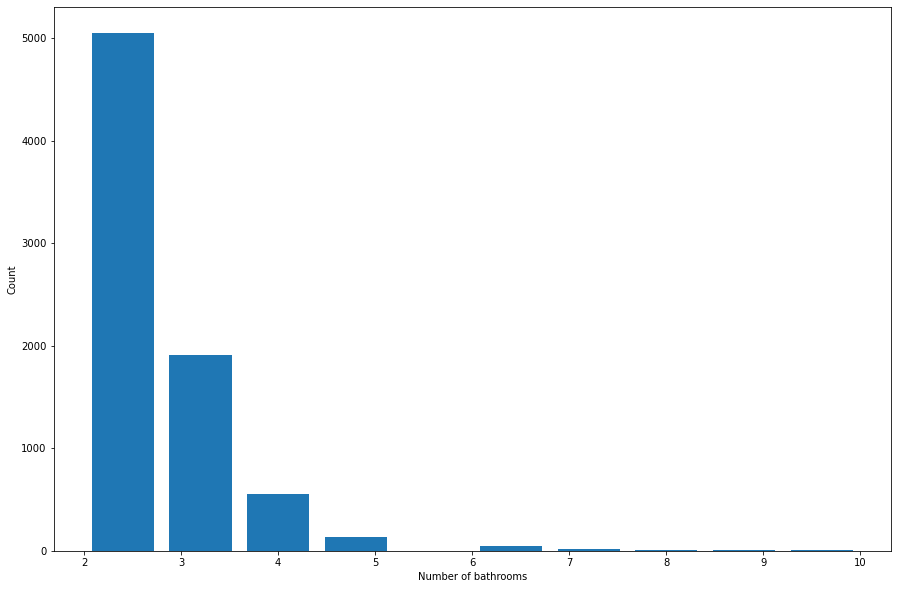

In [54]:
plt.hist(new_data7.Bathrooms,rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')
plt.show()

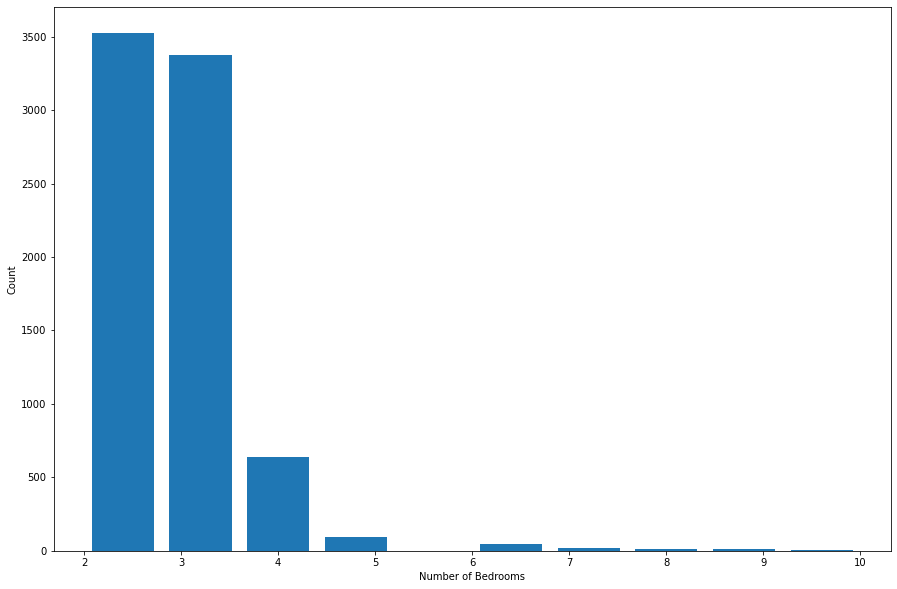

In [55]:
# There are few outliers in the given historgram 
plt.hist(new_data7.Bedrooms,rwidth=0.8)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

In [56]:
# Fetching the hypothtetical conditions


new_data7[(new_data7['Bedrooms']<new_data7["Bathrooms"])&(new_data7['Bedrooms']-new_data7['Bathrooms'])>2]


,Unnamed: 0,price,Address,area,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft,Location,City


In [57]:
new_data8=pd.get_dummies(new_data7.Location)

In [58]:
new_data7.head()

,Unnamed: 0,price,Address,area,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft,Location,City
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,3.0,Under Construction,New Property,1.0,Semi-Furnished,2.0,Flat,4148.148148,Noida Extension,Noida
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,3.0,Ready to Move,New Property,1.0,Semi-Furnished,2.0,Flat,5906.040268,Sector 79,Gurgaon
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,3.0,Ready to Move,New Property,1.0,Unfurnished,2.0,Flat,6918.238994,Vaishali,Ghaziabad
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,2.0,2.0,3.0,Ready to Move,New Property,1.0,Unfurnished,2.0,Flat,3628.571429,Link Road,F Block
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,2.0,2.0,3.0,Ready to Move,Resale,1.0,Unfurnished,3.0,Flat,4592.592593,Jaypee Pavilion Court Sector 128,Noida


In [59]:
new_data8.head()

,"""A"" Block DLF Dilshad Extn",# 1101 Tower 5,0 040 Tower Saraswati Mahagun Puram NH 24 Ghaziabad.,00.,000.,002,002 Regent Tower Ground Floor East Facing,01.,04-1202.,1.,...,wz 20 bhagwan dass nagar extn,wz 254,wz 3091 2ndl floor rani bagh mahindra park,wz 36/ 6H sant garh,wz 45 dayalsar road,wz-419 Nanak Pura,x123,yogesh ljpt ngr ptprty,zeta -1,zeta 1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
new_data10=new_data7.drop(['area','Price_sqft'],axis='columns')

In [61]:
new_data10.head()


,Unnamed: 0,price,Address,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Location,City
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",3.0,3.0,3.0,Under Construction,New Property,1.0,Semi-Furnished,2.0,Flat,Noida Extension,Noida
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",3.0,3.0,3.0,Ready to Move,New Property,1.0,Semi-Furnished,2.0,Flat,Sector 79,Gurgaon
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",4.0,5.0,3.0,Ready to Move,New Property,1.0,Unfurnished,2.0,Flat,Vaishali,Ghaziabad
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",2.0,2.0,3.0,Ready to Move,New Property,1.0,Unfurnished,2.0,Flat,Link Road,F Block
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",2.0,2.0,3.0,Ready to Move,Resale,1.0,Unfurnished,3.0,Flat,Jaypee Pavilion Court Sector 128,Noida


In [62]:
dummy1=pd.get_dummies(new_data10.Location)


In [63]:
dummy1=dummy1.replace({'"A" Block DLF Dilshad Extn': {0: 1}})

In [64]:
dummy1.head()

,"""A"" Block DLF Dilshad Extn",# 1101 Tower 5,0 040 Tower Saraswati Mahagun Puram NH 24 Ghaziabad.,00.,000.,002,002 Regent Tower Ground Floor East Facing,01.,04-1202.,1.,...,wz 20 bhagwan dass nagar extn,wz 254,wz 3091 2ndl floor rani bagh mahindra park,wz 36/ 6H sant garh,wz 45 dayalsar road,wz-419 Nanak Pura,x123,yogesh ljpt ngr ptprty,zeta -1,zeta 1
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
new_data11=pd.concat([new_data10,dummy1.drop('zeta 1',axis='columns')],axis='columns')
new_data11.head()

,Unnamed: 0,price,Address,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,...,winter hills sector 77,wz 20 bhagwan dass nagar extn,wz 254,wz 3091 2ndl floor rani bagh mahindra park,wz 36/ 6H sant garh,wz 45 dayalsar road,wz-419 Nanak Pura,x123,yogesh ljpt ngr ptprty,zeta -1
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",3.0,3.0,3.0,Under Construction,New Property,1.0,Semi-Furnished,...,0,0,0,0,0,0,0,0,0,0
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",3.0,3.0,3.0,Ready to Move,New Property,1.0,Semi-Furnished,...,0,0,0,0,0,0,0,0,0,0
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",4.0,5.0,3.0,Ready to Move,New Property,1.0,Unfurnished,...,0,0,0,0,0,0,0,0,0,0
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",2.0,2.0,3.0,Ready to Move,New Property,1.0,Unfurnished,...,0,0,0,0,0,0,0,0,0,0
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",2.0,2.0,3.0,Ready to Move,Resale,1.0,Unfurnished,...,0,0,0,0,0,0,0,0,0,0


In [66]:
new_data12=new_data11.drop(['Status','neworold','parking','Furnished_status','type_of_building'],axis='columns')
new_data12.head(4)


,Unnamed: 0,price,Address,Bedrooms,Bathrooms,Balcony,Lift,Location,City,"""A"" Block DLF Dilshad Extn",...,winter hills sector 77,wz 20 bhagwan dass nagar extn,wz 254,wz 3091 2ndl floor rani bagh mahindra park,wz 36/ 6H sant garh,wz 45 dayalsar road,wz-419 Nanak Pura,x123,yogesh ljpt ngr ptprty,zeta -1
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",3.0,3.0,3.0,2.0,Noida Extension,Noida,1,...,0,0,0,0,0,0,0,0,0,0
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",3.0,3.0,3.0,2.0,Sector 79,Gurgaon,1,...,0,0,0,0,0,0,0,0,0,0
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",4.0,5.0,3.0,2.0,Vaishali,Ghaziabad,1,...,0,0,0,0,0,0,0,0,0,0
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",2.0,2.0,3.0,2.0,Link Road,F Block,1,...,0,0,0,0,0,0,0,0,0,0


In [67]:

X=new_data12.drop('price',axis='columns')
X['Totsqft']=new_data7['area']
# the code to 
cols=list(X.columns)

move_cols=[cols[-1]]+cols[:-1]
X=X[move_cols]

X=X.loc[:,~X.columns.str.contains('^Unnamed')]   # important codes to remove Unnamed
X=X.drop(columns=['Address','Location','City'])

X.head()   

,Totsqft,Bedrooms,Bathrooms,Balcony,Lift,"""A"" Block DLF Dilshad Extn",# 1101 Tower 5,0 040 Tower Saraswati Mahagun Puram NH 24 Ghaziabad.,00.,000.,...,winter hills sector 77,wz 20 bhagwan dass nagar extn,wz 254,wz 3091 2ndl floor rani bagh mahindra park,wz 36/ 6H sant garh,wz 45 dayalsar road,wz-419 Nanak Pura,x123,yogesh ljpt ngr ptprty,zeta -1
0,1350.0,3.0,3.0,3.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1490.0,3.0,3.0,3.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2385.0,4.0,5.0,3.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1050.0,2.0,2.0,3.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1350.0,2.0,2.0,3.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
Y=new_data12.price
Y.head()

0     5600000.0
1     8800000.0
2    16500000.0
3     3810000.0
4     6200000.0
Name: price, dtype: float64

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=10)


In [70]:
X_train

,Totsqft,Bedrooms,Bathrooms,Balcony,Lift,"""A"" Block DLF Dilshad Extn",# 1101 Tower 5,0 040 Tower Saraswati Mahagun Puram NH 24 Ghaziabad.,00.,000.,...,winter hills sector 77,wz 20 bhagwan dass nagar extn,wz 254,wz 3091 2ndl floor rani bagh mahindra park,wz 36/ 6H sant garh,wz 45 dayalsar road,wz-419 Nanak Pura,x123,yogesh ljpt ngr ptprty,zeta -1
5761,1590.0,3.0,3.0,3.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3600,800.0,2.0,2.0,2.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3369,900.0,2.0,2.0,2.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3929,1365.0,3.0,3.0,2.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6886,2700.0,4.0,4.0,4.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,1350.0,2.0,3.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1347,1650.0,3.0,3.0,3.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4633,2290.0,3.0,4.0,2.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7304,1200.0,3.0,2.0,2.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
score=lr_clf.score(X_test,y_test)
score


0.7303284954914242

In [72]:
y_train
 
     

5761    10500000.0
3600     2800000.0
3369     3200000.0
3929     3900000.0
6886    16600000.0
           ...    
3449     9000000.0
1347     9500000.0
4633    15000000.0
7304     4500000.0
1292     3500000.0
Name: price, Length: 6954, dtype: float64

In [73]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=10)
cross_val_score(LinearRegression(),X,Y,cv=cv)

 

array([-1.07441872e+18, -1.21134365e+14,  7.23438140e-01, -1.20496626e+14,
       -1.88853240e+15])

In [74]:
X.columns

Index(['Totsqft', 'Bedrooms', 'Bathrooms', 'Balcony', 'Lift',
       '"A" Block DLF Dilshad Extn', '# 1101 Tower 5',
       '0 040 Tower Saraswati Mahagun Puram NH 24 Ghaziabad.', '00.', '000.',
       ...
       'winter hills sector 77', 'wz 20 bhagwan dass nagar extn', 'wz 254',
       'wz 3091 2ndl floor rani bagh mahindra park', 'wz 36/ 6H sant garh',
       'wz 45 dayalsar road', 'wz-419 Nanak Pura', 'x123',
       'yogesh ljpt ngr ptprty', 'zeta -1'],
      dtype='object', length=3316)

In [75]:
np.where(X.columns=='# 1101 Tower 5')[0][0]

6

In [76]:
def predict_price(location,sqft,bedrooms,bathrooms,balcony,Lift):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bedrooms
    x[2]=bathrooms
    x[3]=balcony
    x[4]=Lift
    
    if loc_index>=0:
        x[loc_index]=1
        
    return lr_clf.predict([x])[0]

In [77]:
predict_price('# 1101 Tower 5',3670,5,5,2,3)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


36681832.83139113

In [78]:
new_data7[new_data7['Location']=='# 1101 Tower 5']

,Unnamed: 0,price,Address,area,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft,Location,City
1836,1836,36700000.0,"# 1101 Tower 5, Golf Course Extension Road Gur...",3670.0,5.0,5.0,4.0,Ready to Move,New Property,2.0,Semi-Furnished,1.0,Flat,10000.0,# 1101 Tower 5,Golf Course Extension Road Gurgaon


In [79]:
predict_price('wz 20 bhagwan dass nagar extn',1140,3,2,2,2)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


11076186.220896926

In [80]:
new_data7[new_data7['Location']=='wz 20 bhagwan dass nagar extn'] # checking the others parameters 

,Unnamed: 0,price,Address,area,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft,Location,City
2598,2598,11500000.0,"wz 20 bhagwan dass nagar extn, Bhagwan Das Nag...",1140.0,3.0,3.0,2.0,Ready to Move,Resale,1.0,Semi-Furnished,2.0,Flat,10087.719298,wz 20 bhagwan dass nagar extn,Bhagwan Das Nagar


In [81]:
predict_price('winter hills sector 77',1342,1,2,1,2)  # case 1 checking 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


8717637.582387881

In [82]:
new_data7[new_data7['Location']=='winter hills sector 77']

,Unnamed: 0,price,Address,area,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft,Location,City
969,969,8000000.0,"winter hills sector 77, Sector 77 Gurgaon, Sec...",1342.0,2.0,2.0,1.0,Ready to Move,Resale,1.0,Semi-Furnished,2.0,Flat,5961.251863,winter hills sector 77,Sector 77 Gurgaon
